<a href="https://colab.research.google.com/github/Fredrick-Sam-Nilesh/datascience/blob/main/Rice_leaf_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!nvidia-smi

Sat Nov 13 13:48:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    58W / 149W |    271MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
from glob import glob
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:
IMAGE_SIZE=[224,224]
trainpath = '/content/drive/MyDrive/project/train'
validpath = '/content/drive/MyDrive/project/test'

In [ ]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/project/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/project/train',

                                                 target_size = (224, 224),
                                                 batch_size = 30,
                                                 class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project/test',
                                            target_size = (224, 224),
                                            batch_size = 29,
                                            class_mode = 'categorical')

Found 29 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
3/3 [==============================] - 72s 11s/step - loss: 8.4097 - accuracy: 0.4556 - val_loss: 8.7595 - val_accuracy: 0.4828
Epoch 2/20
3/3 [==============================] - 5s 2s/step - loss: 2.8755 - accuracy: 0.7333 - val_loss: 6.7731 - val_accuracy: 0.4828
Epoch 3/20
3/3 [==============================] - 5s 2s/step - loss: 2.9367 - accuracy: 0.7778 - val_loss: 5.9918 - val_accuracy: 0.5517
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 1.4096 - accuracy: 0.8889 - val_loss: 12.2157 - val_accuracy: 0.6552
Epoch 5/20
3/3 [==============================] - 5s 2s/step - loss: 1.9425 - accuracy: 0.8556 - val_loss: 9.7986 - val_accuracy: 0.6552
Epoch 6/20
3/3 [==============================] - 5s 2s/step - loss: 1.3623 - accuracy: 0.9222 - val_loss: 3.4271 - val_accuracy: 0.6897
Epoch 7/20
3/3 [==============================] - 5s 2s/step - loss: 0.5432 - accuracy: 0.9667 - val_loss: 2.0851 - val_accuracy: 0.7241
Epoch 8/20
3/3 [======================

In [ ]:
import matplotlib.pyplot as plt

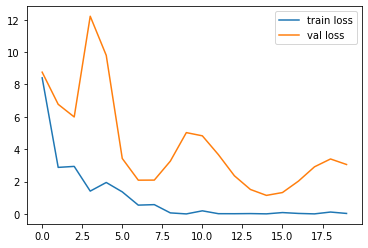

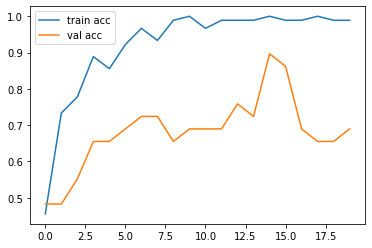

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[2.6906957e-18, 9.9996364e-01, 3.6338613e-05],
       [1.1273002e-11, 1.0000000e+00, 1.7433295e-09],
       [3.1194126e-17, 1.0000000e+00, 1.0512142e-11],
       [9.9999595e-01, 4.0556956e-06, 2.1852214e-11],
       [1.0000000e+00, 7.4153129e-16, 4.0200987e-14],
       [2.0029633e-16, 9.9996805e-01, 3.1968149e-05],
       [7.8345231e-08, 9.9999988e-01, 3.6106827e-12],
       [9.9999917e-01, 8.4098963e-07, 2.3359373e-10],
       [4.7941685e-06, 9.9999475e-01, 4.8636713e-07],
       [3.9996838e-16, 8.9113063e-01, 1.0886944e-01],
       [9.7844930e-14, 1.7562941e-02, 9.8243713e-01],
       [1.8745097e-12, 1.0000000e+00, 5.5044480e-12],
       [1.6877111e-09, 8.6236864e-02, 9.1376317e-01],
       [8.8696855e-01, 8.1581809e-02, 3.1449731e-02],
       [9.9759811e-01, 4.2472634e-10, 2.4018965e-03],
       [1.0000000e+00, 1.1555733e-14, 2.5671673e-10],
       [5.4470209e-14, 1.0000000e+00, 7.7476064e-12],
       [1.0349123e-06, 9.9999893e-01, 1.7232267e-10],
       [1.3247534e-13, 9.999

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 2, 1, 2, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
img_data

NameError: ignored

In [ ]:
img=image.load_img('/content/drive/MyDrive/project/test/bacterial leaf blight/DSC_0401.JPG',target_size=(224,224))

NameError: ignored